In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import pickle
from nltk.stem.snowball import SnowballStemmer   #used for stemmes words



In [2]:
df=pd.read_csv("phishing_site_urls.csv")

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
df.shape

(549346, 2)

<Axes: xlabel='Label'>

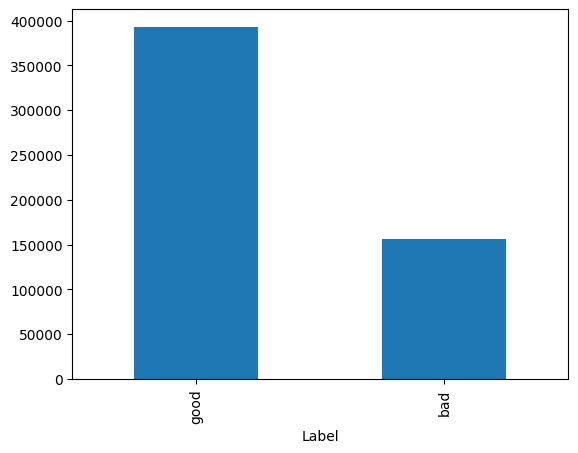

In [6]:
df['Label'].value_counts().plot(kind='bar')

In [7]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [8]:
#Not a Null value in this dataset

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+') #before tokenizer

In [10]:
print(df.URL[0])
df.Label[0]

nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526


'bad'

In [11]:
tokenizer.tokenize(df.URL[0]) #after tokenizer

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [13]:
df.tail(5)

,URL,Label,text_tokenized
549341,23.227.196.215/,bad,[]
549342,apple-checker.org/,bad,"[apple, checker, org]"
549343,apple-iclods.org/,bad,"[apple, iclods, org]"
549344,apple-uptoday.org/,bad,"[apple, uptoday, org]"
549345,apple-search.info,bad,"[apple, search, info]"


In [14]:
stemmer = SnowballStemmer("english")


In [15]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [16]:
df.head(2)

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."


In [17]:
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [18]:
#create cv object
cv = CountVectorizer()

In [19]:
feature = cv.fit_transform(df.text_sent)

In [20]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(feature, df.Label)

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

c:\Users\singh\OneDrive\Desktop\phishing Attack\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lr.score(X_test,y_test)

0.9646708461667286

In [25]:
print('Training Accuracy :',lr.score(X_train,y_train))
print('Testing Accuracy :',lr.score(X_test,y_test))

Training Accuracy : 0.9783232890543653
Testing Accuracy : 0.9646708461667286


In [26]:

confusion_matrix(lr.predict(X_test), y_test)

array([[35500,  1324],
       [ 3528, 96985]])

In [27]:
#Apply Naive Bayes
naive_baiys = MultinomialNB()

In [28]:
naive_baiys.fit(X_train,y_train)

MultinomialNB()

In [29]:
naive_baiys.score(X_test,y_test)

0.9591734201271326

In [30]:
confusion_matrix(naive_baiys.predict(X_test), y_test)

array([[35772,  2351],
       [ 3256, 95958]])

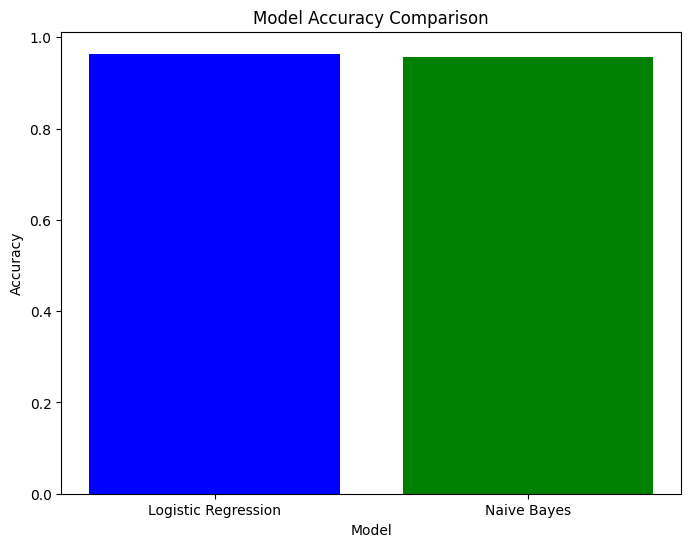

In [31]:
logistic_regression_accuracy =  0.9638698966775159 
naive_bayes_accuracy = 0.9577608364825211  
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logistic_regression_accuracy, naive_bayes_accuracy]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Logistic Regression is the best model, Now we make sklearn pipeline using Logistic Regression..

In [37]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [38]:
X_train,X_test,y_train, y_test = train_test_split(df.URL, df.Label)

In [39]:
pipeline_ls.fit(X_train,y_train)

c:\Users\singh\OneDrive\Desktop\phishing Attack\venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\singh\OneDrive\Desktop\phishing Attack\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [40]:
pipeline_ls.score(X_test,y_test)

0.9669571928904811

In [41]:
pickle.dump(pipeline_ls,open('phishing_Detection.pkl','wb'))

In [42]:
loaded_model = pickle.load(open('phishing_detection.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.9669571928904811


In [46]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing_detection.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("-"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
------------------------------
['good' 'good' 'good' 'good']


In [47]:
predict_bad=['secure-paypal.com.account-update.info/login','login-appleid.com.verify-apple-id.logininfo.org']
loaded_model = pickle.load(open('phishing_detection.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
print(result)

['bad' 'bad']


In [54]:
predict_good=['https://www.linkedin.com']
loaded_model = pickle.load(open('phishing_detection.pkl', 'rb'))
result = loaded_model.predict(predict_good)
print(result)

['good']
